In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 분류

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

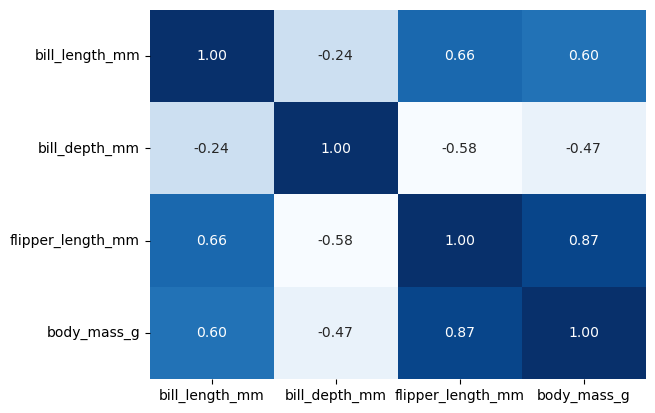

In [7]:
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           cbar = False,
           annot_kws={'size':10},
           fmt = '.2f')

In [8]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace = True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace = True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace = True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace = True)
data['sex'].fillna(data['sex'].mode()[0], inplace = True)

In [9]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
target = 'species'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [11]:
dumm_cols = ['island', 'sex']
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)
x.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [13]:
x_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
24,38.8,17.2,180.0,3800.0,0,0,1
296,47.5,14.2,209.0,4600.0,0,0,0
245,46.1,15.1,215.0,5100.0,0,0,1
255,48.4,16.3,220.0,5400.0,0,0,1
14,34.6,21.1,198.0,4400.0,0,1,1
...,...,...,...,...,...,...,...
132,36.8,18.5,193.0,3500.0,1,0,0
85,41.3,20.3,194.0,3550.0,1,0,1
266,45.5,13.9,210.0,4200.0,0,0,0
69,41.8,19.4,198.0,4450.0,0,1,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
result = {}
lr_model = LogisticRegression()
lr_score = cross_val_score(lr_model, x_train, y_train, cv = 5)
result['Logistic'] = lr_score.mean()

dt_model = DecisionTreeClassifier()
dt_score = cross_val_score(dt_model, x_train, y_train, cv = 5)
result['Decision'] = dt_score.mean()

knn_model = KNeighborsClassifier()
knn_score = cross_val_score(knn_model, x_train_s, y_train, cv = 5)
result['KNN'] = knn_score.mean()

svm_model = SVC()
svm_score = cross_val_score(svm_model, x_train_s, y_train, cv = 5)
result['SVM'] = svm_score.mean()

rf_model = RandomForestClassifier()
rf_score = cross_val_score(rf_model, x_train, y_train, cv = 5)
result['RandomForest'] = rf_score.mean()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_l = le.fit_transform(y_train)
xgb_model = XGBClassifier()
xgb_score = cross_val_score(xgb_model, x_train, y_train_l, cv = 5)
result['XGB'] = xgb_score.mean()

lgb_model = LGBMClassifier()
lgb_score = cross_val_score(lgb_model, x_train, y_train, cv = 5)
result['LGBM'] = lgb_score.mean()

result = pd.DataFrame({'Model': result.keys(), 'Accuracy' : result.values()})
print(result)

          Model  Accuracy
0      Logistic  0.983333
1      Decision  0.954167
2           KNN  0.991667
3           SVM  0.995833
4  RandomForest  0.987500
5           XGB  0.987500
6          LGBM  0.995833


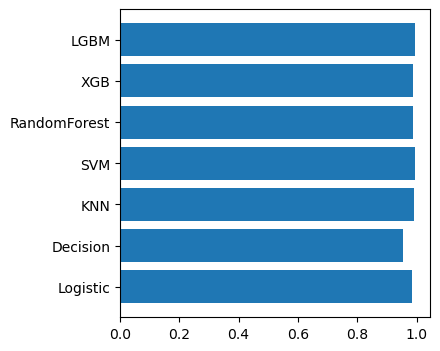

In [17]:
plt.figure(figsize=(4,4))
plt.barh(y = result['Model'], width = result['Accuracy'])
plt.show()

- 모델 중 SVM이 성능이 가장 높음으로 SVM을 모델로 선정하고 파라미터 튜닝

In [28]:
model_svm = SVC()

params = {'kernel' : ['linear', 'rgb', 'ploy'],
         'C' : range(1, 10),
         'gamma' : range(1, 10 )}

model = GridSearchCV(model_svm,
                    params,
                    cv = 5,
                    scoring= 'accuracy')

In [33]:
model.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': range(1, 10), 'gamma': range(1, 10),
                         'kernel': ['linear', 'rgb', 'ploy']},
             scoring='accuracy')

In [34]:
print(model.best_score_)
print(model.best_params_)

0.9958333333333332
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [35]:
y_pred = model.predict(x_test_s)

In [36]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[50  0  0]
 [ 0 21  0]
 [ 1  0 32]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        50
   Chinstrap       1.00      1.00      1.00        21
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



# 회귀

In [37]:
data = sns.load_dataset('car_crashes')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [39]:
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [40]:
data.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

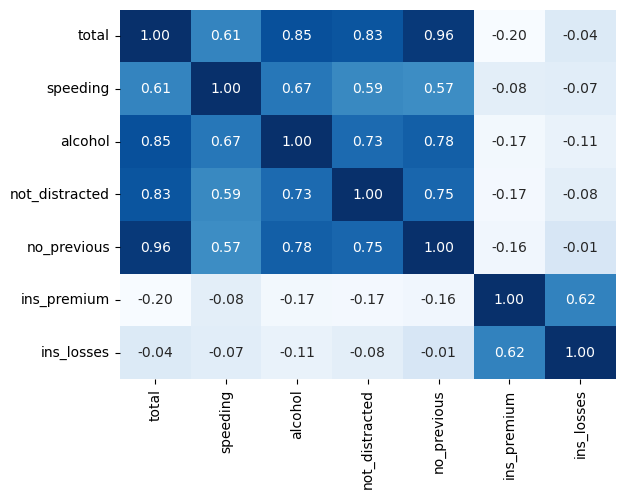

In [41]:
sns.heatmap(data.corr(), 
           annot = True,
           annot_kws={'size' : 10},
           cmap = 'Blues',
           cbar = False,
           fmt = '.2f')

In [42]:
target = 'total'
x = data.drop(target, axis = 1 )
y = data.loc[:, target]

In [43]:
dumm_cols = ['abbrev']
x = pd.get_dummies(x , columns=dumm_cols, drop_first=True)
x.head()

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev_AL,abbrev_AR,abbrev_AZ,abbrev_CA,...,abbrev_SD,abbrev_TN,abbrev_TX,abbrev_UT,abbrev_VA,abbrev_VT,abbrev_WA,abbrev_WI,abbrev_WV,abbrev_WY
0,7.332,5.640,18.048,15.040,784.55,145.08,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.421,4.525,16.290,17.014,1053.48,133.93,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.510,5.208,15.624,17.856,899.47,110.35,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.032,5.824,21.056,21.280,827.34,142.39,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.200,3.360,10.920,10.680,878.41,165.63,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV

In [47]:
result = {}
lr_model = LinearRegression()
lr_score = cross_val_score(lr_model, x_train, y_train, cv = 5)
result['LR'] = lr_score.mean()


dt_model = DecisionTreeRegressor()
dt_score = cross_val_score(dt_model, x_train, y_train, cv = 5)
result['DT'] = dt_score.mean()

svm_model = SVR()
svm_score = cross_val_score(svm_model, x_train_s, y_train, cv = 5)
result['SVR'] = svm_score.mean()

knn_model = KNeighborsRegressor()
knn_score = cross_val_score(knn_model, x_train_s, y_train, cv = 5)
result['KNN'] = knn_score.mean()

rf_model = RandomForestRegressor()
rf_score = cross_val_score(rf_model, x_train, y_train, cv = 5)
result['Random'] = rf_score.mean()

xgb_model = XGBRegressor()
xgb_score = cross_val_score(xgb_model, x_train, y_train, cv = 5)
result['XGB'] = xgb_score.mean()

lgb_model = LGBMRegressor()
lgb_score = cross_val_score(lgb_model, x_train, y_train, cv = 5)
result['LGB'] = lgb_score.mean()

result = pd.DataFrame({'Model' : result.keys(),
                      'R2': result.values()})

In [48]:
result

,Model,R2
0,LR,0.918657
1,DT,0.611030
2,SVR,0.232639
3,KNN,0.647819
4,Random,0.833593
5,XGB,0.724854
6,LGB,-0.167918


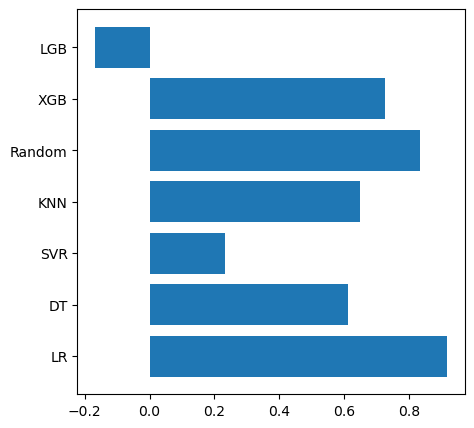

In [49]:
plt.figure(figsize = (5,5))
plt.barh(y = result['Model'], width= result['R2'])
plt.show()

- Linear Regression이 가장 성능이 좋지만, 파라미터 연습ㅇ르 위해 xgb 모델을 선정하여 파라미터 튜닝

In [50]:
xgb_model = XGBRegressor()

# 파라미터 선정
params = {'max_depth' : range(1,51)}

model = GridSearchCV(xgb_model,
                    params,
                    cv = 5,
                    scoring= 'r2')

In [51]:
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': range(1, 51)}, scoring='r2')

In [52]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 1}
0.7941524737385204


 - 변수 중요도 확인

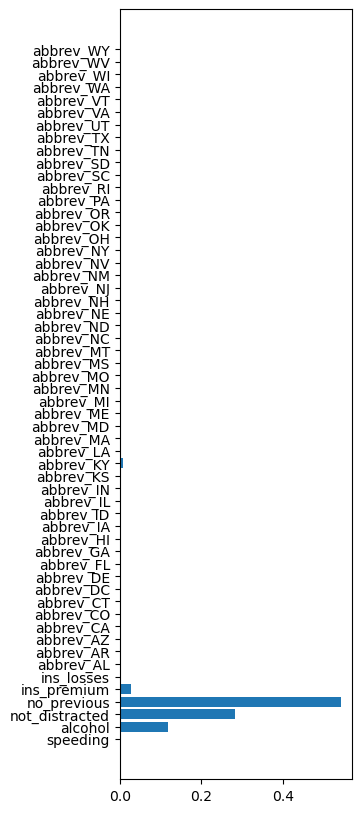

In [53]:
plt.figure(figsize=(3,10))
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

In [54]:
y_pred = model.predict(x_test)
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('R2 : ', r2_score(y_test, y_pred))

MAE :  1.0215545415878298
R2 :  0.8946699257926248
